# Imports and Paths

In [285]:
import json
import pandas as pd
import numpy as np
from plotnine import *
import plotnine

plotnine.options.figure_size = (12, 8)
from pandas.api.types import is_string_dtype
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [2]:
PATH = '/data/msnow/football/'

# Load and clean the Data

In [51]:
df_games_raw = pd.read_json(f'{PATH}games_1512362753.8735218.json')
df_players_raw = pd.read_json(f'{PATH}profiles_1512362725.022629.json')

In [7]:
# df_games_raw.to_feather(f'{PATH}df_games_raw.feather')
# df_players_raw.to_feather(f'{PATH}df_players_raw.feather')
!ls -lh {PATH} 

total 1.9G
-rw-r--r--. 1 msnow msnow 349M Aug 26 15:06 df_games_raw.feather
-rw-r--r--. 1 msnow msnow 4.1M Aug 26 15:06 df_players_raw.feather
-rw-r--r--. 1 msnow msnow 365M Aug 21 19:21 game_player_merge.feather
-rw-rw-r--. 1 msnow msnow 1.1G Dec  8  2017 games_1512362753.8735218.json
-rw-rw-r--. 1 msnow msnow  32M Aug 19 09:12 games_1512362753.8735218.json.zip
-rw-rw-r--. 1 msnow msnow 9.8M Dec  8  2017 profiles_1512362725.022629.json
-rw-rw-r--. 1 msnow msnow 1.5M Aug 19 09:18 profiles_1512362725.022629.json.zip
-rw-rw-r--. 1 msnow msnow 9.9M Aug 19 10:12 season_data.csv
-rw-r--r--. 1 msnow msnow  29M Aug 19 10:11 season_data.feather


In [14]:
df_games_raw.head()

,age,date,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,kick_return_attempts,kick_return_touchdowns,kick_return_yards,opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_id,player_team_score,point_after_attemps,point_after_makes,punt_return_attempts,punt_return_touchdowns,punt_return_yards,punting_attempts,punting_blocked,punting_yards,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,team,year
0,23-120,1990-09-09,0,0,0,0.0,0,0,0,0,0,A,1,False,0,0,0,CHI,17,0,0,0,0.0,0,0,0,0,1809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
1,23-127,1990-09-16,0,0,0,0.0,0,0,0,0,0,H,2,False,0,0,0,RAI,17,0,0,0,0.0,0,0,0,0,1809,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
2,23-134,1990-09-23,0,0,0,0.0,0,0,0,0,0,A,3,False,0,0,0,DEN,34,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
3,23-142,1990-10-01,0,0,0,0.0,0,0,0,0,0,H,4,True,0,0,0,CIN,16,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
4,23-148,1990-10-07,0,0,0,0.0,0,0,0,0,0,A,5,True,0,0,0,NWE,20,0,0,0,0.0,0,0,0,0,1809,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990


In [10]:
df_games_raw.dtypes

age                                        object
date                               datetime64[ns]
defense_interception_touchdowns             int64
defense_interception_yards                  int64
defense_interceptions                       int64
defense_sacks                             float64
defense_safeties                            int64
defense_tackle_assists                      int64
defense_tackles                             int64
field_goal_attempts                         int64
field_goal_makes                            int64
game_location                              object
game_number                                 int64
game_won                                     bool
kick_return_attempts                        int64
kick_return_touchdowns                      int64
kick_return_yards                           int64
opponent                                   object
opponent_score                              int64
passing_attempts                            int64


In [43]:
df_games = df_games_raw.drop(columns=['age'])
cat_dict = {}
cat_dict_list = {}
for n,c in df_games.items():
    if is_string_dtype(c): 
        df_games[n] = c.astype('category').cat.as_ordered()
        cat_dict[n] = {i:v for i,v in enumerate(df_games[n].cat.categories)}
        cat_dict_list[n] = list(df_games[n].cat.categories)
        df_games[n] = df_games[n].cat.codes

In [46]:
df_players_raw.head()

,birth_date,birth_place,college,current_salary,current_team,death_date,draft_position,draft_round,draft_team,draft_year,height,high_school,hof_induction_year,name,player_id,position,weight
0,1967-05-12,"Bay City, TX",Baylor,None,None,None,34.0,2.0,Seattle Seahawks,1990.0,6-0,"Van Vleck, TX",NaN,Robert Blackmon,1809,DB,208.0
1,1970-07-20,"Louisville, KY",Kentucky,None,None,None,85.0,4.0,Seattle Seahawks,1993.0,6-3,"Holy Cross, KY",NaN,Dean Wells,23586,LB,248.0
2,1990-08-14,"Newton, MA",Oregon,"1,075,000",Miami Dolphins,None,46.0,2.0,Buffalo Bills,2013.0,6-3,"Los Gatos, CA",NaN,Kiko Alonso,355,ILB,238.0
3,1948-04-22,"Dallas, TX",North Texas,None,None,1999-10-15,126.0,5.0,New Orleans Saints,1970.0,6-2,"W.W. Samuell, TX",NaN,Steve Ramsey,18182,QB,210.0
4,1988-02-27,"Neptune, NJ",Miami (FL),None,None,None,NaN,NaN,None,NaN,6-0,"Neptune, NJ",NaN,Cory Nelms,16250,CB,195.0


In [52]:
df_players_raw.head()

,birth_date,birth_place,college,current_salary,current_team,death_date,draft_position,draft_round,draft_team,draft_year,height,high_school,hof_induction_year,name,player_id,position,weight
0,1967-05-12,"Bay City, TX",Baylor,None,None,None,34.0,2.0,Seattle Seahawks,1990.0,6-0,"Van Vleck, TX",NaN,Robert Blackmon,1809,DB,208.0
1,1970-07-20,"Louisville, KY",Kentucky,None,None,None,85.0,4.0,Seattle Seahawks,1993.0,6-3,"Holy Cross, KY",NaN,Dean Wells,23586,LB,248.0
2,1990-08-14,"Newton, MA",Oregon,"1,075,000",Miami Dolphins,None,46.0,2.0,Buffalo Bills,2013.0,6-3,"Los Gatos, CA",NaN,Kiko Alonso,355,ILB,238.0
3,1948-04-22,"Dallas, TX",North Texas,None,None,1999-10-15,126.0,5.0,New Orleans Saints,1970.0,6-2,"W.W. Samuell, TX",NaN,Steve Ramsey,18182,QB,210.0
4,1988-02-27,"Neptune, NJ",Miami (FL),None,None,None,NaN,NaN,None,NaN,6-0,"Neptune, NJ",NaN,Cory Nelms,16250,CB,195.0


In [124]:
df_players_narrow = df_players_raw.loc[:,['birth_date','college','height','name','player_id','position']]
df_players_narrow.birth_date = pd.to_datetime(df_players_narrow.birth_date, format='%Y-%m-%d')
df_players_narrow['birth_year'] = df_players_narrow.birth_date.dt.year

In [125]:
ht_tmp_ft = pd.to_numeric(df_players_raw.height.str.split('-').str.get(0), errors='coerce') 
ht_tmp_in = pd.to_numeric(df_players_raw.height.str.split('-').str.get(1), errors='coerce') 
ht_tmp = ht_tmp_ft*12 + ht_tmp_in
ht_tmp.fillna(ht_tmp.mean(),inplace=True)
ht_tmp = ht_tmp.astype(int)
df_players_narrow.height = ht_tmp

In [126]:
df_players_narrow.dtypes

birth_date    datetime64[ns]
college               object
height                 int64
name                  object
player_id              int64
position              object
birth_year           float64
dtype: object

In [127]:
n='college'
df_players_narrow[n] = df_players_narrow['college'].astype('category').cat.as_ordered()
cat_dict[n] = {i:v for i,v in enumerate(df_players_narrow[n].cat.categories)}
cat_dict_list[n] = list(df_players_narrow[n].cat.categories)
df_players_narrow[n] = df_players_narrow[n].cat.codes

In [128]:
df_players_narrow.head()

,birth_date,college,height,name,player_id,position,birth_year
0,1967-05-12,55,72,Robert Blackmon,1809,DB,1967.0
1,1970-07-20,312,75,Dean Wells,23586,LB,1970.0
2,1990-08-14,499,75,Kiko Alonso,355,ILB,1990.0
3,1948-04-22,471,74,Steve Ramsey,18182,QB,1948.0
4,1988-02-27,385,72,Cory Nelms,16250,CB,1988.0


In [148]:
# df_merge = df_games.merge(df_players_narrow, on='player_id', how='left')
# df_merge['age'] = df_merge.year - df_merge.birth_year.astype(int)
df_merge.drop(columns=['birth_date','birth_year'], inplace=True)

In [149]:
df_merge.head()

,date,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,kick_return_attempts,kick_return_touchdowns,kick_return_yards,opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_id,player_team_score,point_after_attemps,point_after_makes,punt_return_attempts,punt_return_touchdowns,punt_return_yards,punting_attempts,punting_blocked,punting_yards,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,team,year,college,height,name,position,age
0,1990-09-09,0,0,0,0.0,0,0,0,0,0,0,1,False,0,0,0,6,17,0,0,0,0.0,0,0,0,0,1809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
1,1990-09-16,0,0,0,0.0,0,0,0,0,0,1,2,False,0,0,0,33,17,0,0,0,0.0,0,0,0,0,1809,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
2,1990-09-23,0,0,0,0.0,0,0,0,0,0,0,3,False,0,0,0,11,34,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
3,1990-10-01,0,0,0,0.0,0,0,0,0,0,1,4,True,0,0,0,7,16,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
4,1990-10-07,0,0,0,0.0,0,0,0,0,0,0,5,True,0,0,0,24,20,0,0,0,0.0,0,0,0,0,1809,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23


In [155]:
df_merge.to_feather(f'{PATH}df_merge.feather')

# Calculate score for each game

In [150]:
ff_passing = df_merge.passing_yards*0.04 + df_merge.passing_touchdowns*4 - df_merge.passing_interceptions*2
ff_rushing = df_merge.rushing_yards*0.1 + df_merge.rushing_touchdowns*6
ff_receiving = df_merge.receiving_yards*0.1 + df_merge.receiving_touchdowns*6
ff_misc = df_merge.kick_return_touchdowns*6 + df_merge.punt_return_touchdowns*6 
ff_kick = df_merge.point_after_makes*2 - df_merge.point_after_attemps + df_merge.field_goal_makes * 5 - df_merge.field_goal_attempts
df_merge['ff_score'] = ff_passing + ff_rushing + ff_receiving + ff_misc + ff_kick

In [170]:
# df_srt = df_merge[['player_id', 'year']].sort_values(['player_id', 'year'])
# first_season = df_srt[['player_id','year']].groupby(['player_id'], sort=False).first().reset_index()
# first_season.rename(columns={'year':'first_season'}, inplace=True)
df_merge_2 = df_merge.merge(first_season,on=['player_id'], how='left')

In [172]:
df_merge_2['season_number'] = df_merge_2.year - df_merge_2.first_season

# visualizations

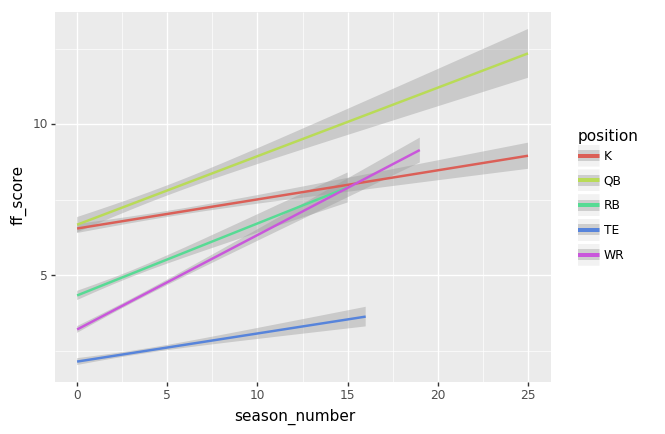

<ggplot: (8781397777507)>

In [237]:
df_year = df_merge_2.loc[:,['player_id','ff_score','season_number','position']]
df_year = df_year.groupby(['player_id','season_number','position'],sort=False,as_index=False).mean()
df_year = df_year.loc[df_year.ff_score>0,:]
df_year = df_year.loc[df_year.position.isin(['RB','WR','QB','TE','K']),:]
ggplot(df_year, aes(x='season_number', y='ff_score',color='position')) + geom_smooth()

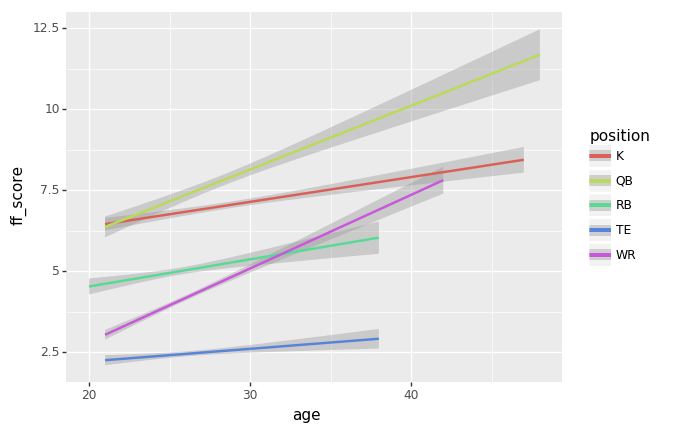

<ggplot: (-9223363255456957261)>

In [240]:
df_age = df_merge_2.loc[:,['player_id','ff_score','age','position']]
df_age = df_age.groupby(['player_id','age','position'],sort=False,as_index=False).mean()
df_age = df_age.loc[df_age.ff_score>0,:]
df_age = df_age.loc[df_age.position.isin(['RB','WR','QB','TE','K']),:]
ggplot(df_age, aes(x='age', y='ff_score',color='position')) + geom_smooth()

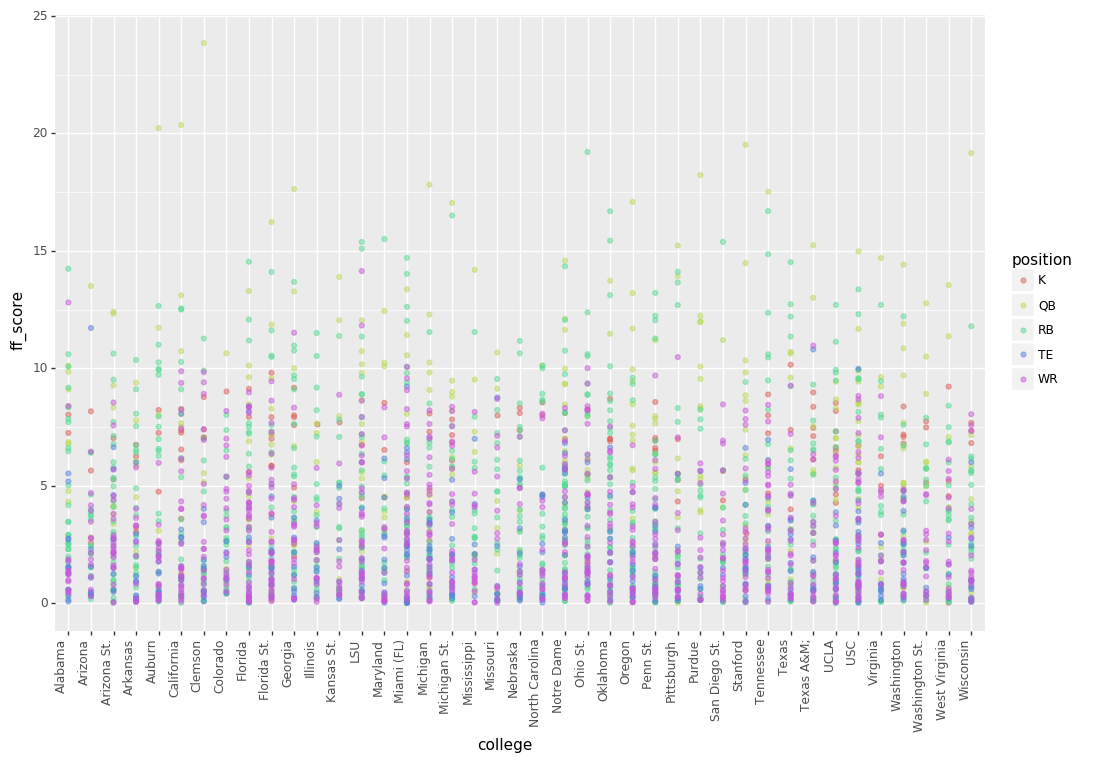

<ggplot: (8781396559894)>

In [287]:
df_college = df_merge_2.loc[:,['player_id','ff_score','college','position']]
df_college.college.replace(cat_dict['college'],inplace=True)
df_college = df_college.groupby(['player_id','college','position'],sort=False,as_index=False).mean()
df_college = df_college.loc[df_college.ff_score>0,:]
df_college = df_college.loc[df_college.position.isin(['RB','WR','QB','TE','K']),:]
college_list = (df_college.college.value_counts()>40).index.tolist()
vc = df_college.college.value_counts()
college_list = vc[vc>40].index.tolist()
df_college2 = df_college.loc[df_college.college.isin(college_list),:]
ggplot(df_college2, aes(x='college', y='ff_score',color='position')) + geom_point(alpha=0.5) + theme(axis_text_x=element_text(rotation=90, hjust=1))

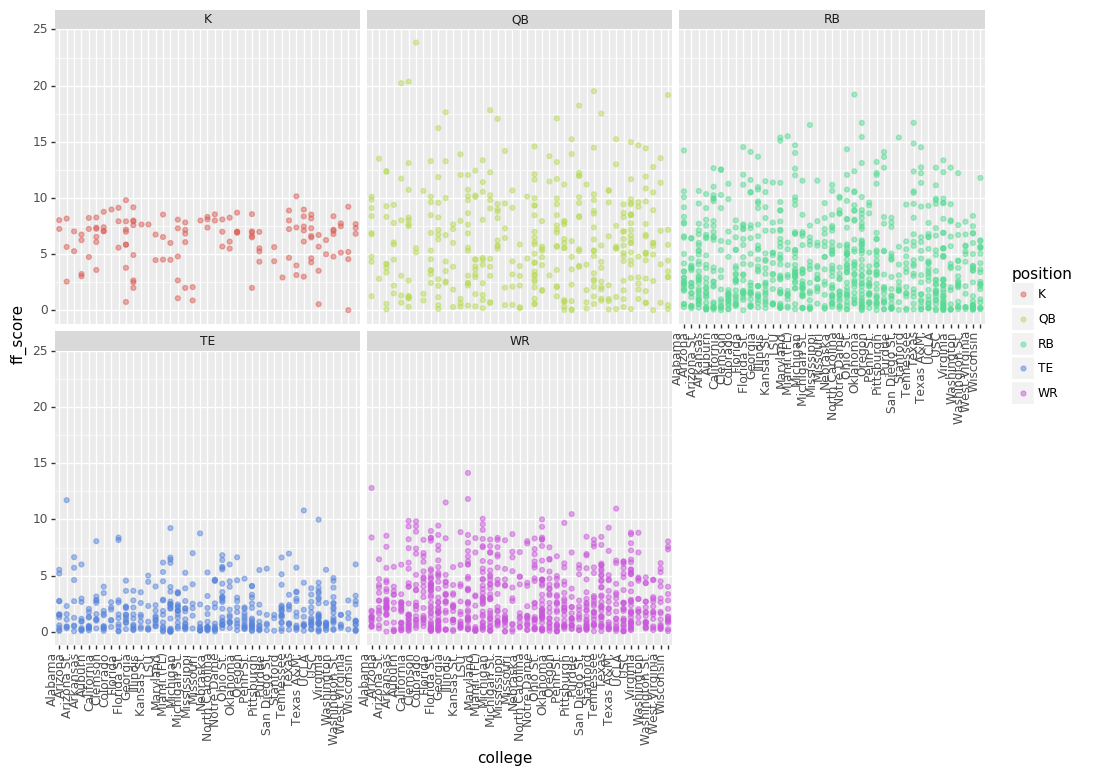

<ggplot: (8781398240881)>

In [346]:
ggplot(df_college2, aes(x='college', y='ff_score',color='position')) + geom_point(alpha=0.5) + theme(axis_text_x=element_text(rotation=90, hjust=1)) + facet_wrap("~position") 

In [339]:
df_year_all = df_merge_2.loc[:,['player_id','ff_score','season_number','position']]
df_year_all = df_year_all.groupby(['player_id','season_number','position'],sort=False,as_index=False).mean()
df_year_all = df_year_all.loc[df_year_all.position.isin(['RB','WR','QB','TE','K']),:]
df_seasonnumber = df_year_all.loc[df_year_all.season_number==0,['player_id','position']]
for i in range(df_year.season_number.max()):
    tmp_df = df_year.loc[df_year.season_number==i,['player_id','ff_score']]
    tmp_df.rename(columns = {'ff_score':'season_'+str(i).zfill(2)}, inplace=True)
    df_seasonnumber = df_seasonnumber.merge(tmp_df, on='player_id', how='left')
df_seasonnumber.head()

,player_id,position,season_00,season_01,season_02,season_03,season_04,season_05,season_06,season_07,season_08,season_09,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_17,season_18,season_19,season_20,season_21,season_22,season_23,season_24
0,18182,QB,NaN,4.377778,5.50000,2.352000,4.142857,6.752727,8.361667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4310,TE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13379,RB,1.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11755,RB,2.864706,5.562500,3.31875,4.416667,16.057143,6.280000,8.133333,7.5375,0.955556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24331,TE,0.258333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 2940 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


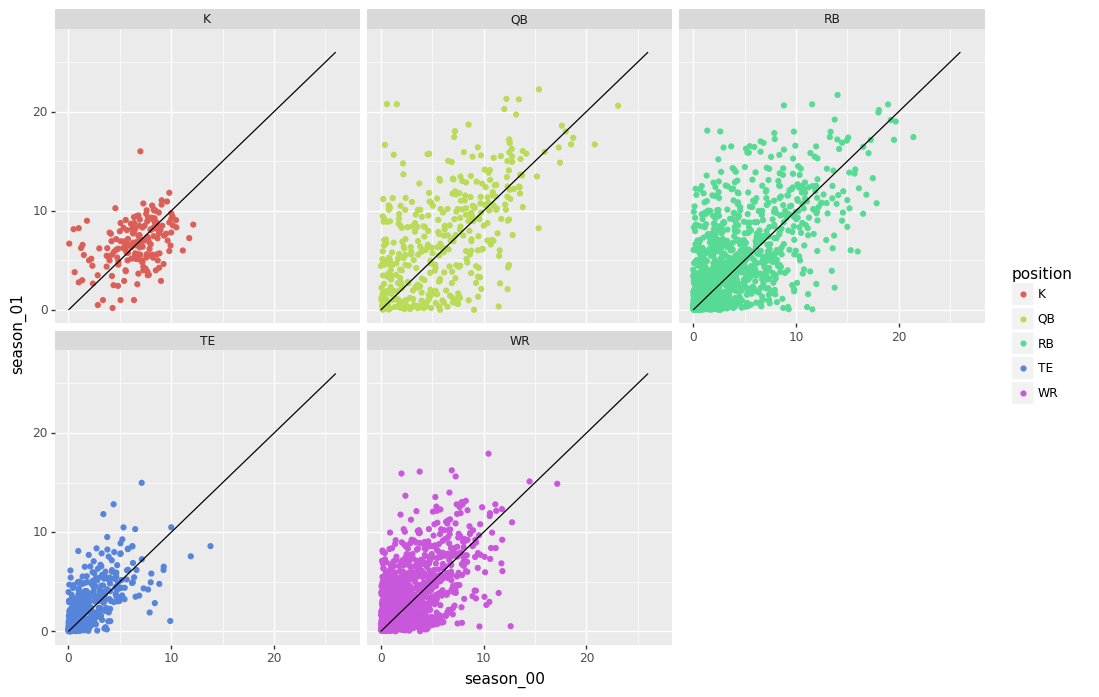

<ggplot: (8781396563348)>

In [338]:
diag_df = pd.DataFrame({'x':[0,26],'y':[0,26]})
p = (ggplot() 
     + geom_point(data=df_seasonnumber, mapping=aes(x='season_00',y='season_01', color='position')) 
     + geom_line(data=diag_df, mapping=aes(x='x',y='y')) 
     + facet_wrap("~position")
     + xlim(0,27)
     + ylim(0,27)
    )
p

/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 3834 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


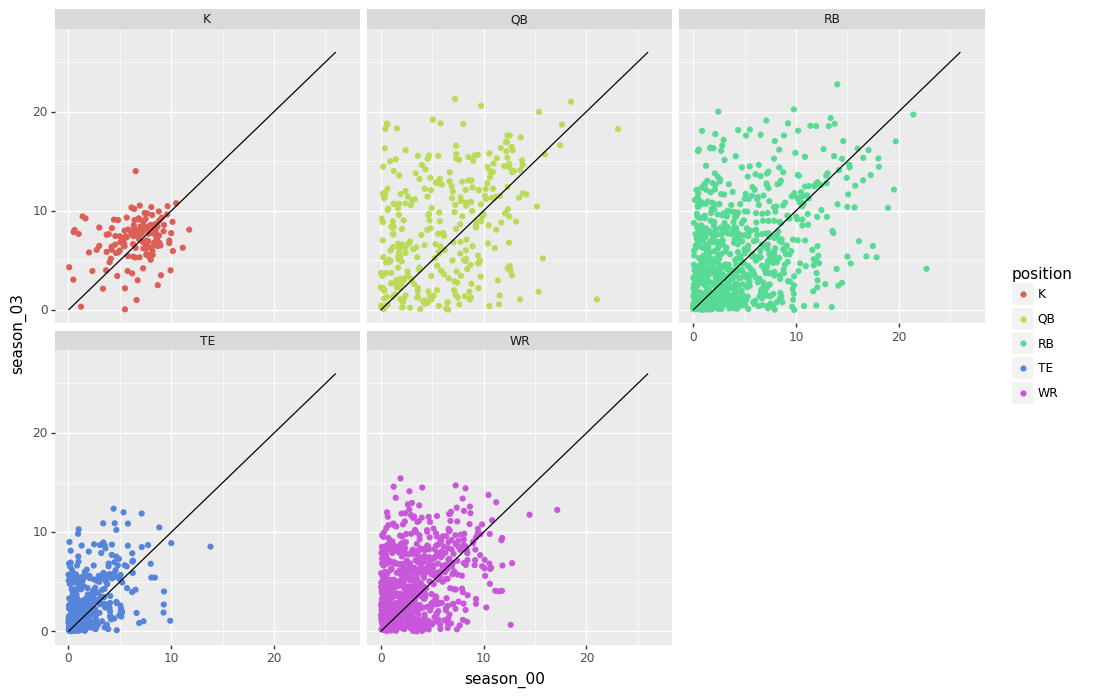

<ggplot: (8781396594166)>

In [345]:
diag_df = pd.DataFrame({'x':[0,26],'y':[0,26]})
p = (ggplot() 
     + geom_point(data=df_seasonnumber, mapping=aes(x='season_00',y='season_03', color='position')) 
     + geom_line(data=diag_df, mapping=aes(x='x',y='y')) 
     + facet_wrap("~position")
     + xlim(0,27)
     + ylim(0,27)
    )
p